# 1. 연구목적 

### - 어떤 데이터를 target으로 지정했을 때 정확도가 높은가?

==> 타겟 지정을 달리했을때의 훈련 점수와, 테스트 점수를 비교하여 

정확도가 높은 모델을 선택한다. 

=> 상관관계에 따라 보스턴시 주택 데이터에 어떤 영향을 미치는지 탐색한다.


# 2. 연구 데이터

### 보스턴 시의 주택 가격 데이터

0 CRIM     town별 1인당 범죄율 

1 ZN       25,000평방피트를 초과하는 거주지역의 비율

2 INDUS    비소매상업지역이 점유하고 있는 토지의 비율

3 CHAS     찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)

4 NOX      10ppm당 농축 일산화질소

5 RM       주택 1가구당 평균 방의 개수

6 AGE      1940년 이전에 건축된 소유주택의 비율

7 DIS      5개의 보스턴 직업센터까지의 접근성 지수

8 RAD      방사형 도로까지의 접근성 지수

9 TAX      10,000달러 당 재산세율

10 PTRATIO  town별 학생/교사 비율

11 B        town별 흑인 비율

12 LSTAT    모집단의 하위계층의 비율(%)

13 MEDV     본인 소유의 주택 가격(중앙값, 단위:$1,000)


## 3. 분석 내용 

## 1) 데이터 탐색 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [94]:
df=pd.read_csv("./dataset/housing.csv", delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


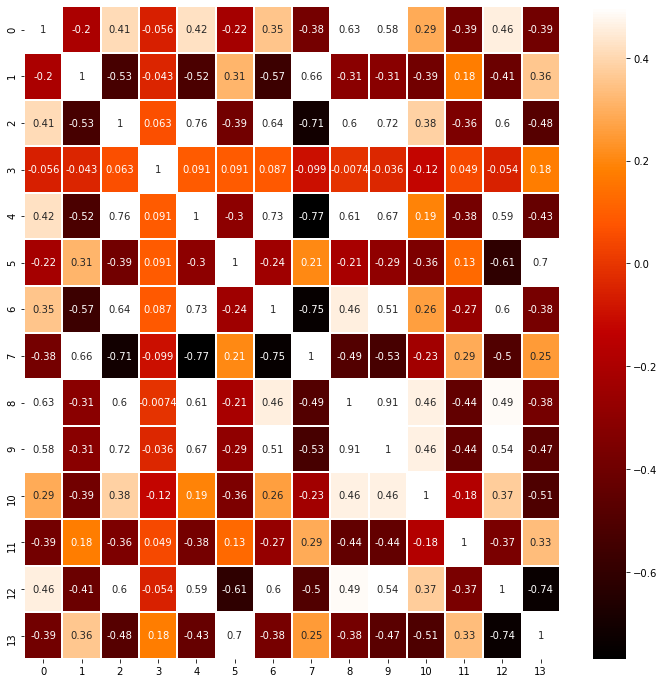

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap=plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show()

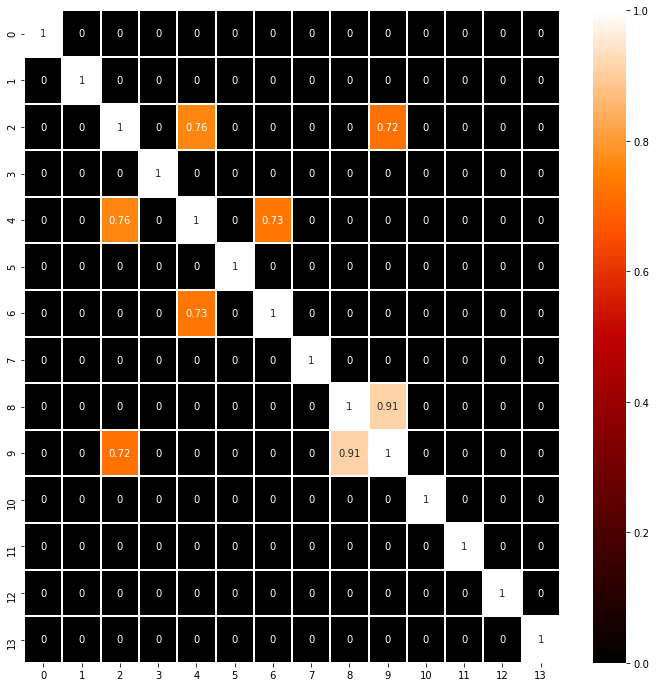

In [98]:
colormap=plt.cm.gist_heat
plt.figure(figsize=(12,12))
d=df.corr()
d[d<0.7]=0
sns.heatmap(d,linewidths=0.1,cmap=colormap,linecolor='white',annot=True)
plt.show()

#10,000달러당 재산세율(9)과 상관관계가 높은 것: 방사형 도로까지의 접근성 지수(8, 0.91), 비소매상업지역이 점유하고 있는 토지의 비율(2, 0.72), 10ppm당 농축 일산화질소(4, 0.67) 

### 1. 상관관계가 높은 09(만달러당 재산세율)을 target으로 둔 경우

In [99]:
dataset=df.values

X=dataset[:,[0,1,2,3,4,5,6,7,8,10,11,12,13]]
Y=dataset[:,9]

train_input, test_input, train_target, test_target=train_test_split(X,Y, test_size=0.2, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [101]:
# KNR 
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=20)
knr.fit(train_scaled, train_target)
print(knr.score(train_scaled, train_target))
print(knr.score(test_scaled, test_target))

0.8714183507360396
0.857275340407696


In [102]:
# 선형회귀 (GOOD!!)
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8899596728304764
0.8875804174371742


 - 훈련 score 테스트 score 차이가 크지 않다.

In [103]:
print(lr.coef_, lr.intercept_)

[ -2.21972888  25.06703242  42.513667    -4.88511153   8.32533391
  -1.56783496  -0.65372006  -9.40561025 123.0860905    2.86942958
  -0.55029102  -7.84165588 -13.89859882] 404.03217821782164


In [104]:
#다항회귀
train_poly=np.column_stack((train_input**3, train_input))
test_poly=np.column_stack((test_input**3, test_input))
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 정확도가 높아짐

0.8972527373179969
0.9008326759620569


- 3차 다항회귀를 통해 훈련 점수와 테스트 점수가 상승되었다.

In [105]:
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_scaled)
train_poly=poly.transform(train_scaled)
test_poly=poly.transform(test_scaled)

In [106]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9623208876613644
0.941845239708462


- 특성이 늘어나면서 선형회귀의 학습 능력 UP

In [107]:
# 릿지 
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 오차가 거의 없음

0.8891275028083886
0.8878771574426152


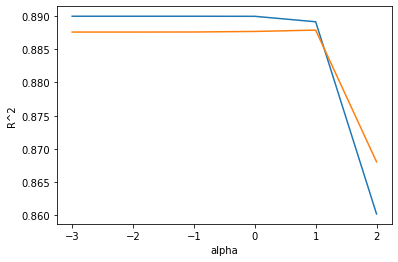

In [108]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001에서 100까지 10배씩 모델 훈련 
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # 릿지 모델 생성 
    ridge.fit(train_scaled, train_target) # 훈련 
    train_score.append(ridge.score(train_scaled, train_target))# 점수 저장
    test_score.append(ridge.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

- 과적합이 아니기 때문에 오차가 거의 없다/  좁혀지는 지점 = 과소적합 
- alpha의 최적값은 10 

In [109]:
# 라쏘
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.8899596715319477
0.8875845716433675


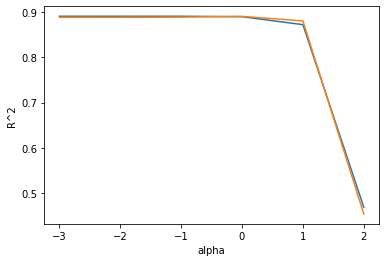

In [110]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

- alpha의 최적값은 0.001 or 0.1 or 1
- 위의 score가 과적합이 아니기 때문에 차이가 별로 없다. 

In [111]:
# SGDClassifier (손실함수)
from sklearn.linear_model import SGDClassifier

sc2= SGDClassifier(loss='log',max_iter=100,random_state=42)
sc2.fit(train_scaled,train_target)
print(sc2.score(train_scaled, train_target))
print(sc2.score(test_scaled, test_target))

# 훈련세트와 테스트 세트의 정확도가 낮다 100번으로 부족 

# 변화무쌍하다, 돌릴때마다, 에러가났다, 레포트거리!! 이유 
# 경향을 띄기 때문에  50점에서 iter=80일때와 90일때 점수가 크게 차이가 나지 않는 이유는 지그재그로 변화무쌍하기 떄문에 큰 차이가 나지 않았다.
# 그래서 에포크 50회가 가장 적당한 훈련수 임은 알수 있다. 

0.7698019801980198
0.5588235294117647


In [112]:
sc2.partial_fit(train_scaled,train_target)
print(sc2.score(train_scaled,train_target))
print(sc2.score(test_scaled,test_target))
# 에포크 실행하니 정확도 조금 향상. 

0.8366336633663366
0.6764705882352942


In [113]:
# 에포크와 과대/과소 적합 

sc3 = SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

# 300번 에포크 동안 훈련
for _ in range(0,300):
    sc3.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc3.score(train_scaled,train_target))
    test_score.append(sc3.score(test_scaled,test_target))

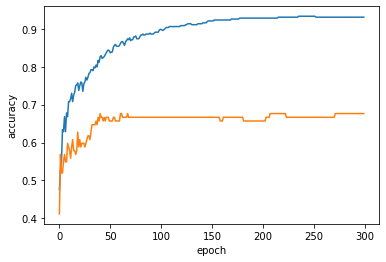

In [114]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [115]:
sc3 = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc3.fit(train_scaled,train_target)
print(sc3.score(train_scaled,train_target))
print(sc3.score(test_scaled,test_target))

# 더이상 높아지지 않는 지점이 50회 이상부터는 test가 높아지지 않는다 
# 에포크 50회가 가장 적당한 훈련 횟수이다. 최적의 모델=50회 (조기종료)

0.8910891089108911
0.6764705882352942


In [116]:
# 의사결정회귀
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대적합 (훈련good)

1.0
0.9608540130358032


In [117]:
# 그리드서치
from sklearn.model_selection import GridSearchCV
params={'min_impurity_decrease':[0.0001, 0.0001, 0.0003, 0.0004, 0.0005]}
gs=GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
dt=gs.best_estimator_
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대적합

1.0
0.9608540130358032


In [118]:
print(gs.best_estimator_)

# 최고의 estimator는 0.0001 일때 이고 랜덤이 42일때이다. 

DecisionTreeRegressor(min_impurity_decrease=0.0001, random_state=42)


In [119]:
print(gs.cv_results_['mean_test_score'])

# 위를 바탕으로 그 때의 점수의 평균이 이렇게 나왔다. 각각 테스트 스코아의 평균이 이렇게 나왔다. 

[0.94316297 0.94316297 0.94316297 0.94316297 0.94316297]


In [120]:
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [121]:
params={'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001), 'max_depth':range(5,20,1), 'min_samples_split':range(2, 100, 10)}

# 이 간격으로 찾았을때의 지점이 / 최적의 파라미터를 찾아서 대입한 것 

In [122]:
gs=GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(train_scaled, train_target)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [123]:
print(gs.best_params_)

# 최고의 파라미터는 

{'max_depth': 7, 'min_impurity_decrease': 0.0001, 'min_samples_split': 12}


In [124]:
print(np.max(gs.cv_results_['mean_test_score']))

# 그떄의 점수 => 그래서 이게 그리드 서치에서의 제일 좋은 점수 
# 하이퍼파라미터 탐색을 자동화, 
# 가장 좋은 검증점수 매개변수를 조합해서 최종 모델훈련 
# 제일 좋은 매개변수 조합으로 최종 점수! 

0.9538819759419443


In [125]:
# 랜덤 포레스트
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_jobs=-1, random_state=42)
scores=cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 과대적합 막아줌 성능 향상. 

0.9948273254398832 0.9654717156268917


=> 5개의 확률을 구하고, 경우마다 조금씩 다를 수 있으니, 5개의 평균값을 기대치로 본다. 
=> (테스트 만으로는 잘 작동하는지 확신이 어려우므로)

In [126]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)
#중요도는 8번(도로까지 접근성 지수)>2번(비소매상업지역 토지)>0,4번(범죄율, 일산화질소)

[3.27547890e-02 7.15649925e-03 6.79428868e-02 7.53147165e-05
 3.31156114e-02 9.52943395e-04 3.40695399e-03 2.11183926e-02
 8.18790386e-01 7.84506256e-03 1.67530705e-03 2.44313384e-03
 2.72271953e-03]


In [127]:
rf=RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)  # 누락 데이터 랜덤포레스트 0.97

0.9728049579109765


In [128]:
# 엑스트라 트리
from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor(n_jobs=-1, random_state=42)
scores=cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9754840574538081


In [129]:
from sklearn.model_selection import StratifiedKFold

splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
et=ExtraTreesRegressor(n_jobs=-1, random_state=42)
scores=cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1, cv=StratifiedKFold())

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 디폴트 값은 5개, 교차검증 k-fold의 수를 늘려보았을때 점수가 더 높게나왔다.  0.9790111250688168 

C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


1.0 0.9790111250688168


In [130]:
et.fit(train_input, train_target)
print(et.feature_importances_)
# 중요도: 8번(방사도로수)> 2번(비소매상업지역 토지) -> 재산세율에는 도로 수와 비소매상업지역 토지가 미치는 영향이 큼
# 엑스트라 트리에서 본 중요도가 차이를 한 눈에 볼 수 있게끔 해줌

[0.02046418 0.0091414  0.11688539 0.00109989 0.03187281 0.00147064
 0.00825286 0.01161312 0.7475232  0.03698817 0.00243068 0.00469866
 0.00755899]


## 그레이디언트 부스팅 => 손실 함수를 최소화

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(random_state=42)
scores=cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 비교적 높은 점수로 좋은 성능 발휘 

0.9961570363254559 0.9619739071030855


In [132]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)
#그레이디언트 부스트의 중요도: 8번>2번

[4.81702539e-03 1.21110740e-02 7.12299026e-02 8.46651022e-06
 4.07323549e-02 4.02089458e-04 6.46106822e-04 1.08051818e-02
 8.44273063e-01 4.83180676e-03 1.67250554e-03 9.68889968e-04
 7.50153372e-03]


In [133]:
# 히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgb=HistGradientBoostingRegressor(random_state=42)
scores=cross_validate(hgb, train_input, train_target, return_train_score=True)

hgb.fit(train_input, train_target)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#과대적합/ 테스트 스코어가 낮아짐

0.9896025133269275 0.9465373264152269


In [134]:
# 특성중요도
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result=permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
# 특성중요도가 아주 잘 드러남(8번 특성이 가장 중요함.)
# 또 높게나왔네 

[0.00959481 0.00419396 0.04416902 0.         0.06402234 0.00337159
 0.00490221 0.03088765 1.30016989 0.0090849  0.00306419 0.00262478
 0.01757062]


In [135]:
result=permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[ 1.67119768e-02  5.70755705e-04  3.79820086e-02  0.00000000e+00
  7.18010167e-02  3.76218058e-03 -8.44407750e-04  1.29011665e-02
  1.31423780e+00  1.27865469e-02  3.88715787e-04  1.68187573e-03
  1.69072181e-02]


### 2. 상관관계가 중등도인 13(본인 소유의 주택 가격)을  target으로 둔 경우

In [136]:
X=dataset[:,:13]
Y=dataset[:,13]

In [137]:
train_input, test_input, train_target, test_target=train_test_split(X,Y, test_size=0.2, random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [139]:
# KNR 
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=20)
knr.fit(train_scaled, train_target)
print(knr.score(train_scaled, train_target))
print(knr.score(test_scaled, test_target))
#전체적인 스코어가 9번을 target으로 정했을 때보다 많이 낮아짐

0.7465745203562384
0.6338839503029159


In [140]:
# 선형회귀(KNR보다는 높음)
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7508856358979673
0.6687594935356322


In [141]:
# 다항회귀(3차 / 정확도가 높아짐)
train_poly=np.column_stack((train_input**3, train_input))
test_poly=np.column_stack((test_input**3, test_input))
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 모델 중 가장 적게 점수 사이의 차이가 제일 적었다. 

0.8273631144456788
0.8174569324763867


In [142]:
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_scaled)
train_poly=poly.transform(train_scaled)
test_poly=poly.transform(test_scaled)

In [143]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 차이가 너무 크고, 테스트 점수 값이 낮음. 

0.9409048466481141
0.806037661046026


In [144]:
# 릿지
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1000)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 그래프를 참고로 하여 그렸으나 전체적인 score가 낮아짐

0.5304419445901294
0.5296954117516082


=> alpha의 최적값은 1000

In [146]:
# 라쏘
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
#훈련SET과 테스트SET의 값이 함께 낮아짐

0.7508856358979673
0.6687594935356324


<ipython-input-146-0ce567cf2af3>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(train_scaled, train_target)
C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4371.565376151721, tolerance: 3.509685514851485
  model = cd_fast.enet_coordinate_descent(


=> alpha의 최적값은 0

In [148]:
# 의사결정회귀
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대적합

1.0
0.8579634380978161


In [149]:
# 그리드서치
from sklearn.model_selection import GridSearchCV
params={'min_impurity_decrease':[0.0001, 0.0001, 0.0003, 0.0004, 0.0005]}
gs=GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
dt=gs.best_estimator_
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대적합

0.9999857537093314
0.8307959354029337


In [150]:
print(gs.best_estimator_)

DecisionTreeRegressor(min_impurity_decrease=0.0001, random_state=42)


In [151]:
print(gs.cv_results_['mean_test_score'])

[0.65932551 0.65932551 0.65856244 0.65324236 0.64466203]


In [152]:
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [153]:
params={'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001), 'max_depth':range(5,20,1), 'min_samples_split':range(2, 100, 10)}

In [154]:
gs=GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1)
gs.fit(train_scaled, train_target)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [155]:
print(gs.best_params_)

{'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 42}


In [156]:
print(np.max(gs.cv_results_['mean_test_score']))

0.7189878924213235


In [157]:
# 랜덤 포레스트
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_jobs=-1, random_state=42)
scores=cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.976740040838022 0.8260974564965702


In [158]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)
#중요도는 5번(주택 1가구당 평균 방의 개수)>12번(모집단의 하위계층 비율)

[0.03806177 0.00175615 0.00795268 0.00100426 0.01554377 0.50384493
 0.01383994 0.06054907 0.00381091 0.01566064 0.01631341 0.01215362
 0.30950883]


In [159]:
rf=RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8367691571150133


In [160]:
# 엑스트라 트리
from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor(n_jobs=-1, random_state=42)
scores=cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9999999996310637 0.857992987573161


In [161]:
et.fit(train_input, train_target)
print(et.feature_importances_)
# 중요도: 5번과 12번이 거의 비슷함. 랜덤포레스트의 중요도와 차이가 있음

[0.02670059 0.00503923 0.04075369 0.02311007 0.04192078 0.33919036
 0.01984859 0.02844052 0.02189783 0.04946183 0.05005573 0.01971589
 0.33386488]


In [162]:
# 그레이디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, random_state=42)
scores=cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9999938557077291 0.8468577834920998


In [163]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)
#그레이디언트 부스트의 중요도: 5번>12번

[2.99489734e-02 4.48248210e-04 1.80081400e-03 3.20569462e-04
 3.13694183e-02 4.15049468e-01 1.55272641e-02 7.46038989e-02
 2.87198949e-03 1.29505653e-02 3.33106944e-02 1.28146547e-02
 3.68983442e-01]


In [164]:
# 히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgb=HistGradientBoostingRegressor(random_state=42)
scores=cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.972487748382218 0.8361021012141739


In [165]:
# 특성중요도
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result=permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
# 특성중요도(12번>5번)

[2.85320474e-02 5.06238341e-04 5.61829374e-03 2.14230580e-03
 4.45497986e-02 4.13792706e-01 2.56672509e-02 6.15457909e-02
 5.13503179e-04 1.86182321e-02 2.38105663e-02 1.32477468e-02
 5.59075861e-01]


In [166]:
result=permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[2.54831541e-02 2.29589529e-04 1.82213731e-03 8.93237160e-05
 4.63238700e-02 3.11380229e-01 1.45581528e-02 6.57137233e-02
 1.32507452e-03 4.25263833e-03 1.90387738e-02 3.96395960e-03
 5.47357702e-01]


#### 나이브 베이즈, SVM

In [167]:
# 분류에만 사용. 자료가 회귀면 불가능

## 3) 비지도 학습 머신러닝 기법 적용 분석 

# K-평균 알고리즘

In [168]:
distortions=[]
X=dataset[:,:]
X

# 모든 데이터 집어넣음.  
# 회귀라서 타겟이 따로 없이 군집(클러스터)를 만듦

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

## 엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

In [169]:
from sklearn.cluster import KMeans
for i in range(1,20): # 클러스터 개수 K를 바꿔가며 kmeans 20번 훈련 
    km=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200, random_state=0)
    km.fit(X) , 
    distortions.append(km.inertia_) # 훈련한 후 inertia 리스트에 추가 
    # 최적의 점을 찾아서 넣어본다.

C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


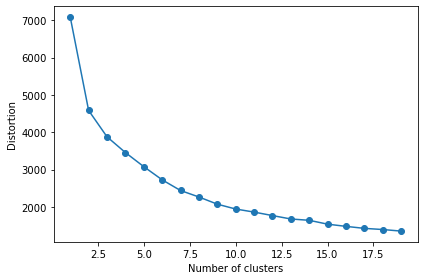

In [195]:
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

- n_clusters=3 에서 그래프가 감소하는 속도가 꺾이므로 적절한 클러스터는 3개라 예측

### 표준화 작업 추가 

In [171]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X)
train_scaled=ss.transform(X)
#test_scaled=ss.transform(test_input)

C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


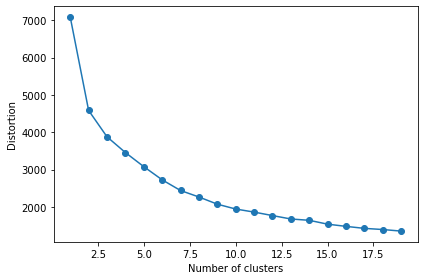

In [172]:
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(train_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# 마찬가지로 n_clusters=3 에서 그래프가 감소하는 속도가 꺾이므로 적절한 클러스터는 3개라 예측 
# (완만)

In [173]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(train_scaled)

from sklearn.metrics import mutual_info_score
mutual_info_score(Y, y_km) # 두 군집 간의 상호 정보 

C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.4160826448759576

In [174]:
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(train_scaled)

mutual_info_score(Y, y_km)

C:\Users\hk428\anaconda3\envs\tf24\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.6907068878681815

- n_clusters=3 더 나눌수록 군집들 간 유사도 ↑

- 특성이 잘 없어서 군집이 안나눠지기 때문에 더 잘게 나눠서 비슷한 특성을 보인다, 유사도가 높게 보인다. 
- 클래스가 많아질수록 유사도가 높아짐, 잘게 쪼갤수록 스코어가 높아짐 

# PCA

In [184]:
from sklearn.decomposition import PCA

pca=PCA()
train_scaled_pca=pca.fit_transform(train_scaled)
pca.explained_variance_ratio_

array([0.46757068, 0.11782371, 0.09635042, 0.06332428, 0.06077853,
       0.04714363, 0.03824363, 0.02879118, 0.01980454, 0.01801839,
       0.0151993 , 0.01307054, 0.00957212, 0.00430905])

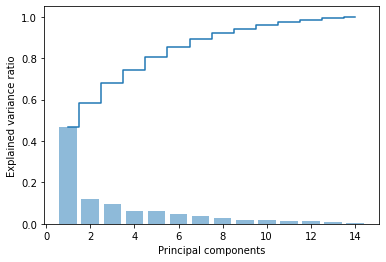

In [185]:
plt.bar(range(1, 15), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 15), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

# 14개의 특성을 그래프로 나타냄. 특정 특성이 영향을 미치는 정도를 그래프로 나타냄. 1~2개만 봤을때 이미 50퍼 이상 넘어감. 

In [186]:
pca = PCA(n_components=2)
train_scaled_pca = pca.fit_transform(train_scaled)
#test_scaled_pca = pca.transform(test_scaled)

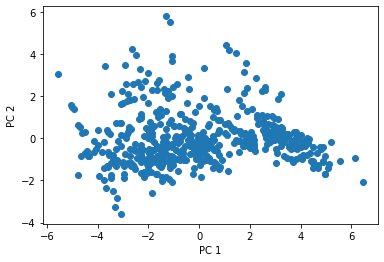

In [187]:
plt.scatter(train_scaled_pca[:, 0], train_scaled_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()
# 군집 없이 나눠짐 

In [188]:
pca = PCA(n_components=2) #평면
result_pca = pca.fit_transform(train_scaled)

In [189]:
np.unique(y_km)

array([0, 1, 2])

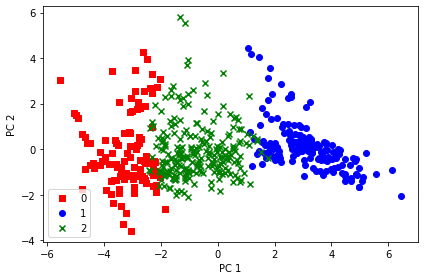

In [190]:
colors = ['r', 'b', 'g']
markers = ['s', 'o', 'x'] # 3개로 색칠 해봤더니, 

for l, c, m in zip(np.unique(y_km), colors, markers):
    plt.scatter(train_scaled_pca[y_km == l, 0], 
                train_scaled_pca[y_km == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
# 색칠해서 나눠봤더니 색으로 정확하게 구분할수있었다. 군집이 제대로 안됐다는 것을, 뭉쳐져있구나 이놈드! 

# 4. 특이점 
## 확률적 경사하강법 (09)

=> 50회가 가장 적합한 에포크 횟수라고 생각했으나, iter=80 일때와 90일때 점수가 크게 차이가 나지 않는다??
오히려 100회를 시행했을때,훈련 score가 더 낮아짐.


이유?
=> SGD의 랜덤한 특성으로 그래프의 50회~100회에서 정확도가 변화무쌍한 지점을 확인.


결과
=> 50회 실행값과 70회 실행값이 변화무쌍하기 때문에 점수가 낮아지거나 높아져도 큰 차이가 없음을 발견.

# 5. 결론

In [ ]:
09 (만달러당 재산세율) 

=> 재산세율을 생각할때는 엑스트라 트리의 정확도가 훈련 셋 1.0, 정확도의 평균 점수가 약 0.98로 높게 나왔다.

=> 그래서 재산세율을 타겟으로 할때는 '엑스트라 트리' 모델을 사용하는것이 가장 적합하다고 생각한다.


=> 재산세율에 가장 영향을 끼치는 특성은 8번 (도로가의 접근성 지수) 라고 볼 수 있다. (거의 모든 특성중요도에서 8번이 높게 나옴)


=> 따라서, '방사형 도로의 접근성 지수' 는 재산세율에 많은 영향을 끼치며, 둘의 상관관계는 높은 것으로 직접 확인 할 수 있었다. 

In [ ]:
13  (본인 소유의 주택 가격) 

=> 주택 가격을 생각할때는 다항회귀가 훈련 셋 0.8274 테스트 셋 0.8173 가장 점수 차이가 제일 적었다.
=> test score의 점수는 엑스트라 트리의 점수가 0.857 정도로 가장 높게 나왔다. 

=> 그래서 주택 가격의 타겟으로 할때는 '다항회귀' , '엑스트라 트리' 모델을 사용하는 것이 가장 적합하다고 생각한다. 


=> 집값에 가장 영향을 끼치는 특성은 5번(방의개수), 12번(하위계층의 비율) 이라고 볼 수 있다. (특성중요도)


=> 따라서, '방의 개수' 와, '하위계층의 비율'은 집값에 많은 영향을 끼치며, 상관성이 높음을 직접 모델을 실행하면서 확인하였다.


In [ ]:
=> 처음에는 주택 가격을 예측하는 데이터로 주어졌지만, 
의도와 다르게 재산세를 타겟으로 두었을때 정확도가 더 높게 나왔으므로 
보스턴시 주택 데이터는 '만 달러 당 재산세' 를 더 잘 설명해주는 데이터라 볼 수 있다.